In [26]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics
import warnings



from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [27]:
Child = pd.read_csv('./Child_model.csv',encoding = 'utf-8')
Child

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_생년월일,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,...,아조_분리조치,아조_원가정보호,아조_가정복귀,아조_사망,아조_기타_1,행조_고소/고발/사,행조_모니터링,행조_아동과의분리,행조_사건처리만나지,행조_만나지못함
0,0804080420141200220001,CASRCP20150110545,CASRCP20150120502,M,10~12세,내국인,NaN,NaN,기타,친부모,...,0,1,0,0,0,0,1,0,0,0
1,0806080620141200290001,CASRCP20150110903,CASRCP20150120827,F,13~15세,내국인,NaN,NaN,자택,친부모,...,0,1,0,0,0,1,0,0,0,0
2,0810010420141200070001,CASRCP20150210146,CASRCP20141221354,F,4~6세,내국인,NaN,NaN,자택,친부모,...,1,0,0,0,0,0,1,1,0,0
3,0104010420141200080001,CASRCP20150210367,CASRCP20141221398,F,16~17세,내국인,NaN,NaN,월세,친부,...,1,1,0,0,0,0,1,0,0,0
4,1103110320141200100001,CASRCP20140810269,CASRCP20150120430,F,1~3세,내국인,NaN,NaN,월세,친부,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87482,5506550620180165980001,CASRCP20180101087,CASRCP20180101089,M,10~12세,내국인,재학중,초등학교,NaN,친부모,...,0,1,0,0,0,0,1,0,0,0
87483,0805080520180100010001,CASRCP20180102176,CASRCP20180102182,M,16~17세,내국인,재학중,고등학교,자택,친부모,...,0,1,0,0,0,0,1,0,0,0
87484,5305530520180166200001,CASRCP20170111840,CASRCP20180103665,F,4~6세,내국인,NaN,NaN,보증금(전세)+월세,친부모,...,1,1,0,0,0,0,1,0,0,0
87485,5801580120180165450001,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,...,0,1,0,0,0,0,1,0,0,0


In [28]:
Child.columns

Index(['개별사건번호', '피해아동대상자', '학대행위자대상', '아동_성별', '아동_생년월일', '아동_내국인여부',
       '아동_최종학력', '아동_직업유형', '아동_거주상태', '아동_친권자유형',
       ...
       '아조_분리조치', '아조_원가정보호', '아조_가정복귀', '아조_사망', '아조_기타_1', '행조_고소/고발/사',
       '행조_모니터링', '행조_아동과의분리', '행조_사건처리만나지', '행조_만나지못함'],
      dtype='object', length=131)

In [29]:
Child.rename

<bound method DataFrame.rename of                        개별사건번호            피해아동대상자            학대행위자대상 아동_성별  \
0      0804080420141200220001  CASRCP20150110545  CASRCP20150120502     M   
1      0806080620141200290001  CASRCP20150110903  CASRCP20150120827     F   
2      0810010420141200070001  CASRCP20150210146  CASRCP20141221354     F   
3      0104010420141200080001  CASRCP20150210367  CASRCP20141221398     F   
4      1103110320141200100001  CASRCP20140810269  CASRCP20150120430     F   
...                       ...                ...                ...   ...   
87482  5506550620180165980001  CASRCP20180101087  CASRCP20180101089     M   
87483  0805080520180100010001  CASRCP20180102176  CASRCP20180102182     M   
87484  5305530520180166200001  CASRCP20170111840  CASRCP20180103665     F   
87485  5801580120180165450001  CASRCP20180100595  CASRCP20180100597     M   
87486  5115511520180165080001  CASRCP20180100289  CASRCP20180100290     F   

      아동_생년월일 아동_내국인여부 아동_최종학력 아동_직업유형   

In [30]:
#key값 먼저 제외 
Chlid_key = Child[['개별사건번호', '피해아동대상자', '학대행위자대상','신대_통계거점','결과_조치결과일자','신고_접수일시']]

Child = Child.drop(['개별사건번호', '피해아동대상자', '학대행위자대상','신대_통계거점','결과_조치결과일자','신고_접수일시'],axis=1)

Child_result = Child[['아특_공격성', '아특_거짓말', '아특_장애의심',
       '아특_배우자폭력', '아특_장루·요루장애', '아특_기타장애', '아특_나태(무기력)', '아특_언어문제',
       '아특_뇌전증장애', '아특_청각장애', '아특_늦은귀가', '아특_어릴적학대경험', '아특_기타', '아특_우울',
       '아특_학습문제', '아특_언어장애', '아특_성문제', '아특_부적절한양육태', '아특_호흡기장애', '아특_양육지식및기술',
       '아특_뇌병변장애', '아특_잦은결석', '아특_틱장애', '아특_인터넷(게임)', '아특_알콜남용', '아특_폭력행동',
       '아특_영양결핍', '아특_자폐성장애', '아특_위생문제', '아특_정신질환및장애', '아특_부부및가족갈등',
       '아특_대인관계기피', '아특_존속학대', '아특_주의산만', '아특_약물', '아특_대소변문제', '아특_안면장애',
       '아특_도박_게임중독', '아특_탐식및결식', '아특_난(難)독해', '아특_흡연', '아특_사회적고립', '아특_정서문제',
       '아특_지체장애', '아특_무력감', '아특_반항', '아특_심장장애', '아특_경제적어려움', '아특_학교부적응',
       '아특_급만성질병', '아특_불건전한또래관', '아특_잦은병치례', '아특_지적장애', '아특_신체질환및장애',
       '아특_과잉행동', '아특_애착문제', '아특_정신장애', '아특_신체발달지연', '아특_스트레스', '아특_낮은자아존중감',
       '아특_오락중독', '아특_신장장애', '아특_허약', '아특_음주', '아특_도벽', '아특_시각장애', '아특_불안',
       '아특_간장애', '아특_무단결과', '아특_사회성문제', '아특_종교문제', '아특_원치않는아동', '아특_비행집단활동',
       '아특_난(難)작문', '아특_충동', '아특_가출', '아특_전과력', '아특_특성없음', '아특_성격및기질문제',
       '아조_분리조치', '아조_원가정보호', '아조_가정복귀', '아조_사망', '아조_기타_1', '행조_고소/고발/사',
       '행조_모니터링', '행조_아동과의분리', '행조_사건처리만나지', '행조_만나지못함']]

Child = Child.drop(['아특_공격성', '아특_거짓말', '아특_장애의심',
       '아특_배우자폭력', '아특_장루·요루장애', '아특_기타장애', '아특_나태(무기력)', '아특_언어문제',
       '아특_뇌전증장애', '아특_청각장애', '아특_늦은귀가', '아특_어릴적학대경험', '아특_기타', '아특_우울',
       '아특_학습문제', '아특_언어장애', '아특_성문제', '아특_부적절한양육태', '아특_호흡기장애', '아특_양육지식및기술',
       '아특_뇌병변장애', '아특_잦은결석', '아특_틱장애', '아특_인터넷(게임)', '아특_알콜남용', '아특_폭력행동',
       '아특_영양결핍', '아특_자폐성장애', '아특_위생문제', '아특_정신질환및장애', '아특_부부및가족갈등',
       '아특_대인관계기피', '아특_존속학대', '아특_주의산만', '아특_약물', '아특_대소변문제', '아특_안면장애',
       '아특_도박_게임중독', '아특_탐식및결식', '아특_난(難)독해', '아특_흡연', '아특_사회적고립', '아특_정서문제',
       '아특_지체장애', '아특_무력감', '아특_반항', '아특_심장장애', '아특_경제적어려움', '아특_학교부적응',
       '아특_급만성질병', '아특_불건전한또래관', '아특_잦은병치례', '아특_지적장애', '아특_신체질환및장애',
       '아특_과잉행동', '아특_애착문제', '아특_정신장애', '아특_신체발달지연', '아특_스트레스', '아특_낮은자아존중감',
       '아특_오락중독', '아특_신장장애', '아특_허약', '아특_음주', '아특_도벽', '아특_시각장애', '아특_불안',
       '아특_간장애', '아특_무단결과', '아특_사회성문제', '아특_종교문제', '아특_원치않는아동', '아특_비행집단활동',
       '아특_난(難)작문', '아특_충동', '아특_가출', '아특_전과력', '아특_특성없음', '아특_성격및기질문제',
       '아조_분리조치', '아조_원가정보호', '아조_가정복귀', '아조_사망', '아조_기타_1', '행조_고소/고발/사',
       '행조_모니터링', '행조_아동과의분리', '행조_사건처리만나지', '행조_만나지못함'],axis = 1)

In [31]:
Child.columns

Index(['아동_성별', '아동_생년월일', '아동_내국인여부', '아동_최종학력', '아동_직업유형', '아동_거주상태',
       '아동_친권자유형', '아동_가족유형', '아동_다문화가족', '아동_가구소득구분코', '아동_기초생활수급유',
       '아동_보호조치유형', '신고_접수경로구분코', '신고_신고자유형구분', '신고_집단시설내사건', '신고_접수유형',
       '신고_신고접수구분', '신고_피해아동상태구', '신대_행위자아동관계', '신대_아동동거여부', '신대_접수유형',
       '조사_집단시설내사건', '조사_조사완료여부', '조사_위험_점수', '조대_재신고여부_1', '조대_동일신고여부',
       '조대_아동동거여부', '조대_특별관리유형', '판단_유형_신체', '판단_유형_정서', '판단_유형_성', '판단_유형_방임',
       '판단_학대발생빈도', '신고_접수연도', 'New_재학대혐의여부', 'New_Call_Count'],
      dtype='object')

In [32]:
for i in Child:
    print(i, Child[i].unique())

아동_성별 ['M' 'F' nan]
아동_생년월일 ['10~12세' '13~15세' '4~6세' '16~17세' '1~3세' nan '7~9세' '0~1세미만' '18~20세']
아동_내국인여부 ['내국인' nan '외국인' '무국적']
아동_최종학력 [nan '재학중' '무학' '고등중퇴' '중등중퇴' '중등졸업' '초등졸업' '고등졸업' '초등중퇴']
아동_직업유형 [nan '초등학교' '중학교' '어린이집' '고등학교' '서비스 및 판매종사자' '무직' '기타' '유치원' '단순노무종사자'
 '전문가' '관리자' '기술공 및 준전문가' '사무종사자' '농림어업숙련종사자' '장치·기계조작 및 조립 종사자'
 '기능원 및 관련 기능 종사자']
아동_거주상태 ['기타' '자택' '월세' '보증금(전세)+월세' nan '무상' '전세' '영구임대아파트  또는 영구임대주택' '보호시설']
아동_친권자유형 ['친부모' '친부' '친모' nan '친권자 없음' '양부' '후견인 없음' '양부모' '양모']
아동_가족유형 ['친부모가정' '부자가족(이혼)' '동거(사실혼포함)' nan '부자가족(별거)' '모자가족(이혼)' '재혼가정' '친인척보호'
 '미혼부·모가정' '모자가족(별거)' '모자가족(사별)' '위탁가정' '기타' '부자가족(가출)' '부자가족(사별)'
 '모자가족(가출)' '시설보호' '소년소녀가정' '입양가정']
아동_다문화가족 ['일반' nan '다문화' '북한이탈주민']
아동_가구소득구분코 [nan '300만원이상' '150만원이상-200만원미만' '50만원미만' '50만원이상~100만원미만'
 '100만원이상-150만원미만' '200만원이상-250만원미만' '250만원이상-300만원미만']
아동_기초생활수급유 ['비수급권대상' '수급권대상' nan]
아동_보호조치유형 [nan  1.]
신고_접수경로구분코 ['112' '아동보호전문기관일반전화' '119' '1366' '내방' '인터넷' '129' '상담원 인지신고' '방문신고'
 '일반전화' '타

In [33]:
Child.shape

(87487, 36)

In [34]:
# Child['조사_조사완료여부'].value_counts()

In [35]:
# for i in range(len(Child['조사_조사완료여부'])):
#     if (Child['조사_조사완료여부'][i] == 'Y'):
#         Child['조사_조사완료여부'][i] = 1
#     elif (Child['조사_조사완료여부'][i] == 'N'):
#         Child['조사_조사완료여부'][i] = 0

In [36]:
# for i in range(len(Child['조대_재신고여부_1'])):
#     if (Child['조대_재신고여부_1'][i] == 'Y'):
#         Child['조대_재신고여부_1'][i] = 1
#     elif (Child['조대_재신고여부_1'][i] == 'N'):
#         Child['조대_재신고여부_1'][i] = 0

In [37]:
# for i in range(len(Child['조대_동일신고여부'])):
#     if (Child['조대_동일신고여부'][i] == 'Y'):
#         Child['조대_동일신고여부'][i] = 1
#     elif (Child['조대_동일신고여부'][i] == 'N'):
#         Child['조대_동일신고여부'][i] = 0
#     else:
#         Child['조대_동일신고여부'][i] = 0

In [38]:
# for i in range(len(Child['조대_아동동거여부'])):
#     if (Child['조대_아동동거여부'][i] == 'Y'):
#         Child['조대_아동동거여부'][i] = 1
#     elif (Child['조대_아동동거여부'][i] == 'N'):
#         Child['조대_아동동거여부'][i] = 0
#     else:
#         Child['조대_아동동거여부'][i] = 0

In [39]:
# for i in range(len(Child['판단_유형_신체'])):
#     if (Child['판단_유형_신체'][i] == 'Y'):
#         Child['판단_유형_신체'][i] = 1
#     elif (Child['판단_유형_신체'][i] == 'N'):
#         Child['판단_유형_신체'][i] = 0

In [40]:
# for i in range(len(Child['판단_유형_정서'])):
#     if (Child['판단_유형_정서'][i] == 'Y'):
#         Child['판단_유형_정서'][i] = 1
#     elif (Child['판단_유형_정서'][i] == 'N'):
#         Child['판단_유형_정서'][i] = 0

In [41]:
# for i in range(len(Child['판단_유형_성'])):
#     if (Child['판단_유형_성'][i] == 'Y'):
#         Child['판단_유형_성'][i] = 1
#     elif (Child['판단_유형_성'][i] == 'N'):
#         Child['판단_유형_성'][i] = 0

In [42]:
# for i in range(len(Child['판단_유형_방임'])):
#     if (Child['판단_유형_방임'][i] == 'Y'):
#         Child['판단_유형_방임'][i] = 1
#     elif (Child['판단_유형_방임'][i] == 'N'):
#         Child['판단_유형_방임'][i] = 0

In [43]:
# for i in Child:
#     print(i, Child[i].unique())

In [44]:
# Child = Child.drop(['판단_유형_유기'],axis=1)

In [45]:
for i in Child:
    print(i, Child[i].unique())

아동_성별 ['M' 'F' nan]
아동_생년월일 ['10~12세' '13~15세' '4~6세' '16~17세' '1~3세' nan '7~9세' '0~1세미만' '18~20세']
아동_내국인여부 ['내국인' nan '외국인' '무국적']
아동_최종학력 [nan '재학중' '무학' '고등중퇴' '중등중퇴' '중등졸업' '초등졸업' '고등졸업' '초등중퇴']
아동_직업유형 [nan '초등학교' '중학교' '어린이집' '고등학교' '서비스 및 판매종사자' '무직' '기타' '유치원' '단순노무종사자'
 '전문가' '관리자' '기술공 및 준전문가' '사무종사자' '농림어업숙련종사자' '장치·기계조작 및 조립 종사자'
 '기능원 및 관련 기능 종사자']
아동_거주상태 ['기타' '자택' '월세' '보증금(전세)+월세' nan '무상' '전세' '영구임대아파트  또는 영구임대주택' '보호시설']
아동_친권자유형 ['친부모' '친부' '친모' nan '친권자 없음' '양부' '후견인 없음' '양부모' '양모']
아동_가족유형 ['친부모가정' '부자가족(이혼)' '동거(사실혼포함)' nan '부자가족(별거)' '모자가족(이혼)' '재혼가정' '친인척보호'
 '미혼부·모가정' '모자가족(별거)' '모자가족(사별)' '위탁가정' '기타' '부자가족(가출)' '부자가족(사별)'
 '모자가족(가출)' '시설보호' '소년소녀가정' '입양가정']
아동_다문화가족 ['일반' nan '다문화' '북한이탈주민']
아동_가구소득구분코 [nan '300만원이상' '150만원이상-200만원미만' '50만원미만' '50만원이상~100만원미만'
 '100만원이상-150만원미만' '200만원이상-250만원미만' '250만원이상-300만원미만']
아동_기초생활수급유 ['비수급권대상' '수급권대상' nan]
아동_보호조치유형 [nan  1.]
신고_접수경로구분코 ['112' '아동보호전문기관일반전화' '119' '1366' '내방' '인터넷' '129' '상담원 인지신고' '방문신고'
 '일반전화' '타

In [46]:
# 종속변수 빼고
X = Child.drop(['New_재학대혐의여부'],axis = 1)
#y = Child['결과_학대혐의여부']

In [47]:
#신고 접수일시는 뒤에 train test나누려고 넣은거니까 일단 더미화에서는 제외
X_call = X['신고_접수연도']
X = X.drop(['신고_접수연도'],axis=1)

In [48]:
for i in X:
    print(i, X[i].unique())

아동_성별 ['M' 'F' nan]
아동_생년월일 ['10~12세' '13~15세' '4~6세' '16~17세' '1~3세' nan '7~9세' '0~1세미만' '18~20세']
아동_내국인여부 ['내국인' nan '외국인' '무국적']
아동_최종학력 [nan '재학중' '무학' '고등중퇴' '중등중퇴' '중등졸업' '초등졸업' '고등졸업' '초등중퇴']
아동_직업유형 [nan '초등학교' '중학교' '어린이집' '고등학교' '서비스 및 판매종사자' '무직' '기타' '유치원' '단순노무종사자'
 '전문가' '관리자' '기술공 및 준전문가' '사무종사자' '농림어업숙련종사자' '장치·기계조작 및 조립 종사자'
 '기능원 및 관련 기능 종사자']
아동_거주상태 ['기타' '자택' '월세' '보증금(전세)+월세' nan '무상' '전세' '영구임대아파트  또는 영구임대주택' '보호시설']
아동_친권자유형 ['친부모' '친부' '친모' nan '친권자 없음' '양부' '후견인 없음' '양부모' '양모']
아동_가족유형 ['친부모가정' '부자가족(이혼)' '동거(사실혼포함)' nan '부자가족(별거)' '모자가족(이혼)' '재혼가정' '친인척보호'
 '미혼부·모가정' '모자가족(별거)' '모자가족(사별)' '위탁가정' '기타' '부자가족(가출)' '부자가족(사별)'
 '모자가족(가출)' '시설보호' '소년소녀가정' '입양가정']
아동_다문화가족 ['일반' nan '다문화' '북한이탈주민']
아동_가구소득구분코 [nan '300만원이상' '150만원이상-200만원미만' '50만원미만' '50만원이상~100만원미만'
 '100만원이상-150만원미만' '200만원이상-250만원미만' '250만원이상-300만원미만']
아동_기초생활수급유 ['비수급권대상' '수급권대상' nan]
아동_보호조치유형 [nan  1.]
신고_접수경로구분코 ['112' '아동보호전문기관일반전화' '119' '1366' '내방' '인터넷' '129' '상담원 인지신고' '방문신고'
 '일반전화' '타

In [49]:
#더미화 필요없는것들을 따로 빼놓고 더미화 이후 concat
X1 = X[['조사_조사완료여부','조대_재신고여부_1','조대_동일신고여부','조대_아동동거여부','판단_유형_신체','판단_유형_정서','판단_유형_성','판단_유형_방임']]
X = X.drop(['조사_조사완료여부','조대_재신고여부_1','조대_동일신고여부','조대_아동동거여부','판단_유형_신체','판단_유형_정서','판단_유형_성','판단_유형_방임'],axis=1)

In [50]:
X_test.columns[0].find('아동_성별_')!=-1
X_test.columns[100:150]

NameError: name 'X_test' is not defined

In [51]:
s='판단_유형_'
lst = []

for i in range(len(X_test.columns)):
    if (X_test.columns[i].find(s)!=-1):
        lst.append(X_test.columns[i].split(s)[1])
lst

NameError: name 'X_test' is not defined

In [ ]:
columns_lst

In [ ]:
for i in X:
    print(i, X[i].unique())
#nan 0 1도 집어넣음 (nan없애려고)

In [52]:
#연속형도 더미화 하기위해 str로 변경
X = X.astype(str)

In [53]:
X = pd.get_dummies(X)

In [54]:
#더미화한거랑, 더미화되어있던거랑(더미화작업필요없는변수들) 특성(이것도 사실상 더미화되어있는변수들) concat
X = pd.concat([X,X1,Child_result],axis = 1)
X

,아동_성별_F,아동_성별_M,아동_성별_nan,아동_생년월일_0~1세미만,아동_생년월일_10~12세,아동_생년월일_13~15세,아동_생년월일_16~17세,아동_생년월일_18~20세,아동_생년월일_1~3세,아동_생년월일_4~6세,...,아조_분리조치,아조_원가정보호,아조_가정복귀,아조_사망,아조_기타_1,행조_고소/고발/사,행조_모니터링,행조_아동과의분리,행조_사건처리만나지,행조_만나지못함
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87482,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
87483,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
87484,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,0,0,0
87485,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [55]:
for i in X.columns:
    print(i)

아동_성별_F
아동_성별_M
아동_성별_nan
아동_생년월일_0~1세미만
아동_생년월일_10~12세
아동_생년월일_13~15세
아동_생년월일_16~17세
아동_생년월일_18~20세
아동_생년월일_1~3세
아동_생년월일_4~6세
아동_생년월일_7~9세
아동_생년월일_nan
아동_내국인여부_nan
아동_내국인여부_내국인
아동_내국인여부_무국적
아동_내국인여부_외국인
아동_최종학력_nan
아동_최종학력_고등졸업
아동_최종학력_고등중퇴
아동_최종학력_무학
아동_최종학력_재학중
아동_최종학력_중등졸업
아동_최종학력_중등중퇴
아동_최종학력_초등졸업
아동_최종학력_초등중퇴
아동_직업유형_nan
아동_직업유형_고등학교
아동_직업유형_관리자
아동_직업유형_기능원 및 관련 기능 종사자
아동_직업유형_기술공 및 준전문가
아동_직업유형_기타
아동_직업유형_농림어업숙련종사자
아동_직업유형_단순노무종사자
아동_직업유형_무직
아동_직업유형_사무종사자
아동_직업유형_서비스 및 판매종사자
아동_직업유형_어린이집
아동_직업유형_유치원
아동_직업유형_장치·기계조작 및 조립 종사자
아동_직업유형_전문가
아동_직업유형_중학교
아동_직업유형_초등학교
아동_거주상태_nan
아동_거주상태_기타
아동_거주상태_무상
아동_거주상태_보증금(전세)+월세
아동_거주상태_보호시설
아동_거주상태_영구임대아파트  또는 영구임대주택
아동_거주상태_월세
아동_거주상태_자택
아동_거주상태_전세
아동_친권자유형_nan
아동_친권자유형_양모
아동_친권자유형_양부
아동_친권자유형_양부모
아동_친권자유형_친권자 없음
아동_친권자유형_친모
아동_친권자유형_친부
아동_친권자유형_친부모
아동_친권자유형_후견인 없음
아동_가족유형_nan
아동_가족유형_기타
아동_가족유형_동거(사실혼포함)
아동_가족유형_모자가족(가출)
아동_가족유형_모자가족(별거)
아동_가족유형_모자가족(사별)
아동_가족유형_모자가족(이혼)
아동_가족유형_미혼부·모가정
아동_가족유형_부자가족(가출)
아동_가족유형_부자가족(별거)
아동_가족유형_부자가족(사별)
아동_가족

In [56]:
for i in X.columns:
    if (i[-1] == 'n'):
        X = X.drop([i],axis = 1)

In [57]:
for i in X:
    print(i, X[i].unique())

아동_성별_F [0 1]
아동_성별_M [1 0]
아동_생년월일_0~1세미만 [0 1]
아동_생년월일_10~12세 [1 0]
아동_생년월일_13~15세 [0 1]
아동_생년월일_16~17세 [0 1]
아동_생년월일_18~20세 [0 1]
아동_생년월일_1~3세 [0 1]
아동_생년월일_4~6세 [0 1]
아동_생년월일_7~9세 [0 1]
아동_내국인여부_내국인 [1 0]
아동_내국인여부_무국적 [0 1]
아동_내국인여부_외국인 [0 1]
아동_최종학력_고등졸업 [0 1]
아동_최종학력_고등중퇴 [0 1]
아동_최종학력_무학 [0 1]
아동_최종학력_재학중 [0 1]
아동_최종학력_중등졸업 [0 1]
아동_최종학력_중등중퇴 [0 1]
아동_최종학력_초등졸업 [0 1]
아동_최종학력_초등중퇴 [0 1]
아동_직업유형_고등학교 [0 1]
아동_직업유형_관리자 [0 1]
아동_직업유형_기능원 및 관련 기능 종사자 [0 1]
아동_직업유형_기술공 및 준전문가 [0 1]
아동_직업유형_기타 [0 1]
아동_직업유형_농림어업숙련종사자 [0 1]
아동_직업유형_단순노무종사자 [0 1]
아동_직업유형_무직 [0 1]
아동_직업유형_사무종사자 [0 1]
아동_직업유형_서비스 및 판매종사자 [0 1]
아동_직업유형_어린이집 [0 1]
아동_직업유형_유치원 [0 1]
아동_직업유형_장치·기계조작 및 조립 종사자 [0 1]
아동_직업유형_전문가 [0 1]
아동_직업유형_중학교 [0 1]
아동_직업유형_초등학교 [0 1]
아동_거주상태_기타 [1 0]
아동_거주상태_무상 [0 1]
아동_거주상태_보증금(전세)+월세 [0 1]
아동_거주상태_보호시설 [0 1]
아동_거주상태_영구임대아파트  또는 영구임대주택 [0 1]
아동_거주상태_월세 [0 1]
아동_거주상태_자택 [0 1]
아동_거주상태_전세 [0 1]
아동_친권자유형_양모 [0 1]
아동_친권자유형_양부 [0 1]
아동_친권자유형_양부모 [0 1]
아동_친권자유형_친권자 없음 [0 1]
아동_친권자유형_친모 [0 1]
아동_친권자

In [58]:
#1 0 nan인 변수들의 nan 0으로 변경
#X = X.fillna(0)

In [59]:
for i in X:
    print(i, X[i].unique())

아동_성별_F [0 1]
아동_성별_M [1 0]
아동_생년월일_0~1세미만 [0 1]
아동_생년월일_10~12세 [1 0]
아동_생년월일_13~15세 [0 1]
아동_생년월일_16~17세 [0 1]
아동_생년월일_18~20세 [0 1]
아동_생년월일_1~3세 [0 1]
아동_생년월일_4~6세 [0 1]
아동_생년월일_7~9세 [0 1]
아동_내국인여부_내국인 [1 0]
아동_내국인여부_무국적 [0 1]
아동_내국인여부_외국인 [0 1]
아동_최종학력_고등졸업 [0 1]
아동_최종학력_고등중퇴 [0 1]
아동_최종학력_무학 [0 1]
아동_최종학력_재학중 [0 1]
아동_최종학력_중등졸업 [0 1]
아동_최종학력_중등중퇴 [0 1]
아동_최종학력_초등졸업 [0 1]
아동_최종학력_초등중퇴 [0 1]
아동_직업유형_고등학교 [0 1]
아동_직업유형_관리자 [0 1]
아동_직업유형_기능원 및 관련 기능 종사자 [0 1]
아동_직업유형_기술공 및 준전문가 [0 1]
아동_직업유형_기타 [0 1]
아동_직업유형_농림어업숙련종사자 [0 1]
아동_직업유형_단순노무종사자 [0 1]
아동_직업유형_무직 [0 1]
아동_직업유형_사무종사자 [0 1]
아동_직업유형_서비스 및 판매종사자 [0 1]
아동_직업유형_어린이집 [0 1]
아동_직업유형_유치원 [0 1]
아동_직업유형_장치·기계조작 및 조립 종사자 [0 1]
아동_직업유형_전문가 [0 1]
아동_직업유형_중학교 [0 1]
아동_직업유형_초등학교 [0 1]
아동_거주상태_기타 [1 0]
아동_거주상태_무상 [0 1]
아동_거주상태_보증금(전세)+월세 [0 1]
아동_거주상태_보호시설 [0 1]
아동_거주상태_영구임대아파트  또는 영구임대주택 [0 1]
아동_거주상태_월세 [0 1]
아동_거주상태_자택 [0 1]
아동_거주상태_전세 [0 1]
아동_친권자유형_양모 [0 1]
아동_친권자유형_양부 [0 1]
아동_친권자유형_양부모 [0 1]
아동_친권자유형_친권자 없음 [0 1]
아동_친권자유형_친모 [0 1]
아동_친권자

In [60]:
#train test에 이용하기위해 신고_접수일시 concat
X = pd.concat([X,X_call],axis = 1)
X

,아동_성별_F,아동_성별_M,아동_생년월일_0~1세미만,아동_생년월일_10~12세,아동_생년월일_13~15세,아동_생년월일_16~17세,아동_생년월일_18~20세,아동_생년월일_1~3세,아동_생년월일_4~6세,아동_생년월일_7~9세,...,아조_원가정보호,아조_가정복귀,아조_사망,아조_기타_1,행조_고소/고발/사,행조_모니터링,행조_아동과의분리,행조_사건처리만나지,행조_만나지못함,신고_접수연도
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2014.0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,2014.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,2014.0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2014.0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87482,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2018.0
87483,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,2018.0
87484,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2018.0
87485,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,2018.0


In [61]:
#분석을 위해 다시 float으로 type변경
X = X.astype(float)
#y = y.astype(float)

In [62]:
for i in X:
    print(i, X[i].unique())

아동_성별_F [0. 1.]
아동_성별_M [1. 0.]
아동_생년월일_0~1세미만 [0. 1.]
아동_생년월일_10~12세 [1. 0.]
아동_생년월일_13~15세 [0. 1.]
아동_생년월일_16~17세 [0. 1.]
아동_생년월일_18~20세 [0. 1.]
아동_생년월일_1~3세 [0. 1.]
아동_생년월일_4~6세 [0. 1.]
아동_생년월일_7~9세 [0. 1.]
아동_내국인여부_내국인 [1. 0.]
아동_내국인여부_무국적 [0. 1.]
아동_내국인여부_외국인 [0. 1.]
아동_최종학력_고등졸업 [0. 1.]
아동_최종학력_고등중퇴 [0. 1.]
아동_최종학력_무학 [0. 1.]
아동_최종학력_재학중 [0. 1.]
아동_최종학력_중등졸업 [0. 1.]
아동_최종학력_중등중퇴 [0. 1.]
아동_최종학력_초등졸업 [0. 1.]
아동_최종학력_초등중퇴 [0. 1.]
아동_직업유형_고등학교 [0. 1.]
아동_직업유형_관리자 [0. 1.]
아동_직업유형_기능원 및 관련 기능 종사자 [0. 1.]
아동_직업유형_기술공 및 준전문가 [0. 1.]
아동_직업유형_기타 [0. 1.]
아동_직업유형_농림어업숙련종사자 [0. 1.]
아동_직업유형_단순노무종사자 [0. 1.]
아동_직업유형_무직 [0. 1.]
아동_직업유형_사무종사자 [0. 1.]
아동_직업유형_서비스 및 판매종사자 [0. 1.]
아동_직업유형_어린이집 [0. 1.]
아동_직업유형_유치원 [0. 1.]
아동_직업유형_장치·기계조작 및 조립 종사자 [0. 1.]
아동_직업유형_전문가 [0. 1.]
아동_직업유형_중학교 [0. 1.]
아동_직업유형_초등학교 [0. 1.]
아동_거주상태_기타 [1. 0.]
아동_거주상태_무상 [0. 1.]
아동_거주상태_보증금(전세)+월세 [0. 1.]
아동_거주상태_보호시설 [0. 1.]
아동_거주상태_영구임대아파트  또는 영구임대주택 [0. 1.]
아동_거주상태_월세 [0. 1.]
아동_거주상태_자택 [0. 1.]
아동_거주상태_전세 [0. 1.]
아동_친권자유형_양모

In [63]:
X = X.fillna(0)

In [64]:
# X_DB = pd.concat([Chlid_key,X],axis=1)
# X_DB.to_csv('C:/Users/SUJIN/Desktop/X_DB.csv',encoding='utf-8',index = False)

In [65]:
# X_DB.to_csv('C:/Users/SUJIN/Desktop/X_DB_CP949.csv',encoding='CP949',index = False)

# Train(2014-2017) / test(2018)

In [66]:
X_train = X[(X['신고_접수연도'] == 2014) | (X['신고_접수연도'] == 2015) | (X['신고_접수연도'] == 2016) | (X['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)
X_train

,아동_성별_F,아동_성별_M,아동_생년월일_0~1세미만,아동_생년월일_10~12세,아동_생년월일_13~15세,아동_생년월일_16~17세,아동_생년월일_18~20세,아동_생년월일_1~3세,아동_생년월일_4~6세,아동_생년월일_7~9세,...,아조_분리조치,아조_원가정보호,아조_가정복귀,아조_사망,아조_기타_1,행조_고소/고발/사,행조_모니터링,행조_아동과의분리,행조_사건처리만나지,행조_만나지못함
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62805,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62806,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62807,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62808,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [67]:
X_test = X[(X['신고_접수연도'] == 2018)]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,아동_성별_F,아동_성별_M,아동_생년월일_0~1세미만,아동_생년월일_10~12세,아동_생년월일_13~15세,아동_생년월일_16~17세,아동_생년월일_18~20세,아동_생년월일_1~3세,아동_생년월일_4~6세,아동_생년월일_7~9세,...,아조_분리조치,아조_원가정보호,아조_가정복귀,아조_사망,아조_기타_1,행조_고소/고발/사,행조_모니터링,행조_아동과의분리,행조_사건처리만나지,행조_만나지못함
62810,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62811,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
62812,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62813,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
62814,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87482,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87483,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87485,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
y = Child[['New_재학대혐의여부','신고_접수연도']]
y
y.index

RangeIndex(start=0, stop=87487, step=1)

In [69]:
for i in y.index:
    if (y.loc[i,'New_재학대혐의여부'] == 'Y'):
        y.loc[i,'New_재학대혐의여부'] = 1
    if (y.loc[i,'New_재학대혐의여부'] == 'N'):
        y.loc[i,'New_재학대혐의여부'] = 0

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [70]:
y['New_재학대혐의여부'].value_counts()

0    49370
1    38117
Name: New_재학대혐의여부, dtype: int64

In [71]:
y = y.astype(float)

In [72]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

In [73]:
y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62810, 287)
(24677, 287)
(62810, 1)
(24677, 1)


# Undersampling할거면 돌려라

In [75]:
from collections import Counter
from imblearn.under_sampling import *
X_train,y_train = RandomUnderSampler(random_state = 10).fit_sample(X_train,y_train)

# Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


임계점 default(0.5)일 때 정확도 :  0.9659196822952547 

임계점 0.1 일때 정확도는 0.97입니다.
임계점 0.2 일때 정확도는 0.97입니다.
임계점 0.3 일때 정확도는 0.97입니다.
임계점 0.4 일때 정확도는 0.97입니다.
임계점 0.5 일때 정확도는 0.97입니다.
임계점 0.6 일때 정확도는 0.97입니다.
임계점 0.7 일때 정확도는 0.96입니다.
임계점 0.8 일때 정확도는 0.96입니다.
임계점 0.9 일때 정확도는 0.91입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [78]:
print(Logit.score(X_train, y_train))

0.965217552442369


In [79]:
print(Logit.score(X_test, y_test))

0.9659196822952547


In [80]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.96522
테스트 세트 정확도 : 0.96592


In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [82]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[13033   509]
 [ 1666  9469]]

정확도: 0.9119
정밀도: 0.9490
재현율: 0.8504
F1: 0.8970
AUC: 0.9064


In [ ]:
# cm = confusion_matrix(y_test, y_pred)

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cm)
# ax.grid(False)
# ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
# ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
# ax.set_ylim(1.5, -0.5)
# for i in range(2):
#     for j in range(2):
#         ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
# plt.show()

In [83]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

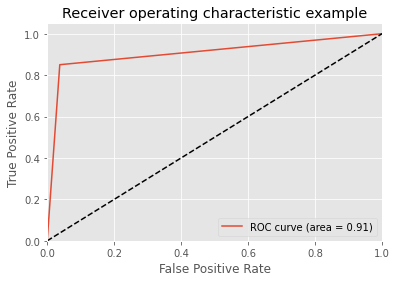

In [84]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression - 변수 중요도 확인

In [ ]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree

In [ ]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

In [ ]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

In [ ]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [ ]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
get_clf_eval(y_test, pred_probs)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - 변수 중요도

In [ ]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest

In [85]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=5, random_state=0)

In [86]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.965
테스트 세트 정확도 : 0.966


In [87]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 1, 0, 1, 0, 1]


In [88]:
pred_probs

array([0., 0., 0., ..., 1., 0., 0.])

In [89]:
get_clf_eval(y_test, preds)

오차행렬:
 [[12705   837]
 [   12 11123]]

정확도: 0.9656
정밀도: 0.9300
재현율: 0.9989
F1: 0.9632
AUC: 0.9686


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


# Random Forest - 특성 중요도

In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBOOST

In [ ]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

In [ ]:
X_train

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [ ]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

In [ ]:
get_clf_eval(y_test, preds)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# XGBOOST - 변수중요도

In [ ]:
# # get importance
# importance = xgb_model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()

In [ ]:
xgboost.plot_importance(xgb_model)

In [ ]:
import joblib
Logit = joblib.load('logistic_model.pkl') 
xgb_model = joblib.load('xgb_model.pkl') 
forest = joblib.load('forest_model.pkl') 

# SVM

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

In [ ]:
get_clf_eval(y_test, y_pred)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Parameter Grid
# param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10]}

# # Make grid search classifier
# clf_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)

# # Train the classifier
# clf_grid.fit(X_train, y_train)

In [ ]:
# import matplotlib.pyplot as plt
# # Split data to train and test on 80-20 ratio
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# print("Displaying data. Close window to continue.")
# # Plot data
# plot_data(X_train, y_train, X_test, y_test)

# # make a classifier and fit on training data
# clf_1 = svm.SVC(kernel='linear', C=1)
# clf_1.fit(X_train, y_train)

# print("Display decision function (C=1) ...\nThe SVM classifier will choose a large margin decision boundary at the expense of larger number of misclassifications")
# # Plot decision function on training and test data
# plot_decision_function(X_train, y_train, X_test, y_test, clf_1)

# # make a classifier and fit on training data
# clf_100 = svm.SVC(kernel='linear', C=100)
# clf_100.fit(X_train, y_train)

# print("Accuracy(C=1): {}%".format(clf_1.score(X_test, y_test) * 100 ))
# print("\n")
# print("Display decision function (C=100) ...\nThe classifier will choose a low margin decision boundary and try to minimize the misclassifications")
# # Plot decision function on training and test data
# plot_decision_function(X_train, y_train, X_test, y_test, clf_100)

# print("Accuracy(C=100): {}%".format(clf_100.score(X_test, y_test) * 100 ))

# # Make predictions on unseen test data
# clf_1_predictions = clf_1.predict(X_test)
# clf_100_predictions = clf_100.predict(X_test)

In [ ]:
columns_lst = []
for i in X_train.columns:
    columns_lst.append(i)

columns_lst

In [ ]:
len(columns_lst)

In [ ]:
아동_성별_F
아동_성별_M
아동_생년월일_0~1세미만
아동_생년월일_10~12세
아동_생년월일_13~15세
아동_생년월일_16~17세
아동_생년월일_18~20세
아동_생년월일_1~3세
아동_생년월일_4~6세
아동_생년월일_7~9세
아동_내국인여부_내국인
아동_내국인여부_무국적
아동_내국인여부_외국인
아동_최종학력_고등졸업
아동_최종학력_고등중퇴
아동_최종학력_무학
아동_최종학력_재학중
아동_최종학력_중등졸업
아동_최종학력_중등중퇴
아동_최종학력_초등졸업
아동_최종학력_초등중퇴
아동_직업유형_고등학교
아동_직업유형_관리자
아동_직업유형_기능원 및 관련 기능 종사자
아동_직업유형_기술공 및 준전문가
아동_직업유형_기타
아동_직업유형_농림어업숙련종사자
아동_직업유형_단순노무종사자
아동_직업유형_무직
아동_직업유형_사무종사자
아동_직업유형_서비스 및 판매종사자
아동_직업유형_어린이집
아동_직업유형_유치원
아동_직업유형_장치·기계조작 및 조립 종사자
아동_직업유형_전문가
아동_직업유형_중학교
아동_직업유형_초등학교
아동_거주상태_기타
아동_거주상태_무상
아동_거주상태_보증금(전세)+월세
아동_거주상태_보호시설
아동_거주상태_영구임대아파트  또는 영구임대주택
아동_거주상태_월세
아동_거주상태_자택
아동_거주상태_전세
아동_친권자유형_양모
아동_친권자유형_양부
아동_친권자유형_양부모
아동_친권자유형_친권자 없음
아동_친권자유형_친모
아동_친권자유형_친부
아동_친권자유형_친부모
아동_친권자유형_후견인 없음
아동_가족유형_기타
아동_가족유형_동거(사실혼포함)
아동_가족유형_모자가족(가출)
아동_가족유형_모자가족(별거)
아동_가족유형_모자가족(사별)
아동_가족유형_모자가족(이혼)
아동_가족유형_미혼부·모가정
아동_가족유형_부자가족(가출)
아동_가족유형_부자가족(별거)
아동_가족유형_부자가족(사별)
아동_가족유형_부자가족(이혼)
아동_가족유형_소년소녀가정
아동_가족유형_시설보호
아동_가족유형_위탁가정
아동_가족유형_입양가정
아동_가족유형_재혼가정
아동_가족유형_친부모가정
아동_가족유형_친인척보호
아동_다문화가족_다문화
아동_다문화가족_북한이탈주민
아동_다문화가족_일반
아동_가구소득구분코_100만원이상-150만원미만
아동_가구소득구분코_150만원이상-200만원미만
아동_가구소득구분코_200만원이상-250만원미만
아동_가구소득구분코_250만원이상-300만원미만
아동_가구소득구분코_300만원이상
아동_가구소득구분코_50만원미만
아동_가구소득구분코_50만원이상~100만원미만
아동_기초생활수급유_비수급권대상
아동_기초생활수급유_수급권대상
아동_보호조치유형_1.0
아동_보호조치유형_nan
신고_접수경로구분코_112
신고_접수경로구분코_119
신고_접수경로구분코_129
신고_접수경로구분코_1366
신고_접수경로구분코_기타
신고_접수경로구분코_내방
신고_접수경로구분코_방문신고
신고_접수경로구분코_상담원 인지신고
신고_접수경로구분코_아동보호전문기관일반전화
신고_접수경로구분코_아동행복지원
신고_접수경로구분코_아동행복지원  상담원인지신고
신고_접수경로구분코_아동행복지원  읍면동인지신고
신고_접수경로구분코_인터넷
신고_접수경로구분코_일반전화
신고_접수경로구분코_타기관통보
신고_신고자유형구분_비신고의무자
신고_신고자유형구분_신고의무자
신고_집단시설내사건_교육기관
신고_집단시설내사건_기타
신고_집단시설내사건_시설
신고_집단시설내사건_어린이집
신고_집단시설내사건_해당사항없음
신고_접수유형_아동학대 의심사례
신고_접수유형_피해아동보호명령을 통한 인지
신고_접수유형_학대행위자 법원명령을 통한 인지(임시조치, 보호처분)
신고_신고접수구분_경찰접수
신고_신고접수구분_아동보호전문기관접수
신고_피해아동상태구_아동사망
신고_피해아동상태구_중상해(의식불명 포함)
신고_피해아동상태구_해당사항없음
신대_행위자아동관계_계모
신대_행위자아동관계_계부
신대_행위자아동관계_기타
신대_행위자아동관계_기타시설종사자
신대_행위자아동관계_낯선사람
신대_행위자아동관계_베이비시터(아이돌보미)
신대_행위자아동관계_부모의 동거인
신대_행위자아동관계_아동복지시설종사자
신대_행위자아동관계_아동을 보호ㆍ양육ㆍ교육하거나 그 의무가 있는 자
신대_행위자아동관계_양모
신대_행위자아동관계_양부
신대_행위자아동관계_어린이집(보육교직원, 종사자)
신대_행위자아동관계_외조모
신대_행위자아동관계_외조부
신대_행위자아동관계_위탁모
신대_행위자아동관계_위탁부
신대_행위자아동관계_유치원(교사,교직원, 종사자)
신대_행위자아동관계_이웃
신대_행위자아동관계_청소년관련시설종사자
신대_행위자아동관계_친모
신대_행위자아동관계_친부
신대_행위자아동관계_친인척
신대_행위자아동관계_친조모
신대_행위자아동관계_친조부
신대_행위자아동관계_학교(교원, 교직원)
신대_행위자아동관계_학원(강사, 종사자)
신대_행위자아동관계_형제자매
신대_아동동거여부_동거
신대_아동동거여부_비동거
신대_접수유형_동일신고
신대_접수유형_아동학대 의심사례
신대_접수유형_응급아동학대의심사례
조사_집단시설내사건_교육기관
조사_집단시설내사건_시설
조사_집단시설내사건_어린이집
조사_위험_점수_1.0
조사_위험_점수_2.0
조사_위험_점수_3.0
조사_위험_점수_4.0
조사_위험_점수_5.0
조사_위험_점수_6.0
조사_위험_점수_7.0
조사_위험_점수_8.0
조사_위험_점수_9.0
조대_특별관리유형_가족재결합 평가도구 사용
조대_특별관리유형_공동모금회사업
조대_특별관리유형_아동인권지킴이단
조대_특별관리유형_종단연구
판단_학대발생빈도_1개월에 한번
판단_학대발생빈도_1년에 한번
판단_학대발생빈도_1주일에 한번
판단_학대발생빈도_2-3개월에 한번
판단_학대발생빈도_2~3일에 한번
판단_학대발생빈도_2년에 한번
판단_학대발생빈도_2주일에 한번
판단_학대발생빈도_3년에 한번
판단_학대발생빈도_6개월에 한번
판단_학대발생빈도_거의 매일
판단_학대발생빈도_일회성
NEW_CALL_COUNT_1
NEW_CALL_COUNT_10
NEW_CALL_COUNT_11
NEW_CALL_COUNT_12
NEW_CALL_COUNT_13
NEW_CALL_COUNT_14
NEW_CALL_COUNT_15
NEW_CALL_COUNT_16
NEW_CALL_COUNT_17
NEW_CALL_COUNT_2
NEW_CALL_COUNT_3
NEW_CALL_COUNT_4
NEW_CALL_COUNT_5
NEW_CALL_COUNT_6
NEW_CALL_COUNT_7
NEW_CALL_COUNT_8
NEW_CALL_COUNT_9
조사_조사완료여부
조대_재신고여부_1
조대_동일신고여부
조대_아동동거여부
판단_유형_신체
판단_유형_정서
판단_유형_성
판단_유형_방임
아특_공격성
아특_거짓말
아특_장애의심
아특_배우자폭력
아특_장루요루장애
아특_기타장애
아특_나태무기력
아특_언어문제
아특_뇌전증장애
아특_청각장애
아특_늦은귀가
아특_어릴적학대경험
아특_기타
아특_우울
아특_학습문제
아특_언어장애
아특_성문제
아특_부적절한양육태
아특_호흡기장애
아특_양육지식및기술
아특_뇌병변장애
아특_잦은결석
아특_틱장애
아특_인터넷게임
아특_알콜남용
아특_폭력행동
아특_영양결핍
아특_자폐성장애
아특_위생문제
아특_정신질환및장애
아특_부부및가족갈등
아특_대인관계기피
아특_존속학대
아특_주의산만
아특_약물
아특_대소변문제
아특_안면장애
아특_도박_게임중독
아특_탐식및결식
아특_난독해
아특_흡연
아특_사회적고립
아특_정서문제
아특_지체장애
아특_무력감
아특_반항
아특_심장장애
아특_경제적어려움
아특_학교부적응
아특_급만성질병
아특_불건전한또래관
아특_잦은병치례
아특_지적장애
아특_신체질환및장애
아특_과잉행동
아특_애착문제
아특_정신장애
아특_신체발달지연
아특_스트레스
아특_낮은자아존중감
아특_오락중독
아특_신장장애
아특_허약
아특_음주
아특_도벽
아특_시각장애
아특_불안
아특_간장애
아특_무단결과
아특_사회성문제
아특_종교문제
아특_원치않는아동
아특_비행집단활동
아특_난작문
아특_충동
아특_가출
아특_전과력
아특_특성없음
아특_성격및기질문제
아조_분리조치
아조_원가정보호
아조_가정복귀
아조_사망
아조_기타_1
행조_고소고발사
행조_모니터링
행조_아동과의분리
행조_사건처리만나지
행조_만나지못함

In [ ]:
X.shape

In [ ]:
X.columns

# 확률 추출해보기

In [ ]:
#모델 저장하기
import os
os.getcwd()

In [ ]:
import joblib
joblib.dump(Logit, 'logistic_model.pkl') 
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(forest, 'forest_model.pkl') 

In [ ]:
#불러오기
import joblib
log_clf = joblib.load('logistic_model.pkl') 
xgb_model = joblib.load('xgb_model.pkl') 
forest = joblib.load('forest_model.pkl')

In [ ]:
#예시
import numpy as np
test = []
for i in range(len(X_test.columns)):
    test.append(0)
a=model_avg(test)

In [ ]:
def model_avg(data):
    
    test = np.array(data)
    
    # Logistic regression
    Logit_prob = round(Logit.predict_proba([test])[0][1]*100,2)
    print("로지스틱 : 입력한 아동의 재학대 발생률은 {}%입니다.".format(Logit_prob))
    
    
    # Random forest
    forest_prob = round(forest.predict_proba([test])[0][1]*100,2)
    print("랜덤포레스트 : 입력한 아동의 재학대 발생률은 {}%입니다.".format(forest_prob))
    
    
    # Xgboost
    nam = X_test.columns

    # test를 데이터 프레임 형태로 변환
    test1 =pd.DataFrame(test.reshape(len(test) // len(nam), len(nam)), columns=nam)

    # 입력값의 예측값 출력
    xgb_prob = round(xgb_model.predict(test1)[0] * 100,2)
    print("XGBOOST : 입력한 아동의 재학대 발생률은 {}%입니다.".format(xgb_prob))
    
    print("\n입력한 아동의 재학대 발생률의 평균은 {}%입니다.".format(round((Logit_prob+forest_prob+xgb_prob)/3.0,2)))

    return round((Logit_prob+forest_prob+xgb_prob)/3.0,2)

In [ ]:
test = np.array(X_test.iloc[5:6]).tolist()[0]

In [ ]:
model_avg(test)

In [ ]:
count =0
for i in X_test.columns:
    print(count, i)
    count+=1
    